In [1]:
#!/usr/bin/env python

'''
GA Data Science Q2 2016

In-class exercise 5: Logistic regression using StatsModels
'''

import os

import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
BANKNOTES_URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'

var_names = ['wavelet_var', 'wavelet_skew', 'wavelet_kurt', 'entropy', 'forged']

In [9]:
# Read in the Banknote Authentication dataset
banknote = pd.read_csv('../../Data/banknote.csv', names = ['wavelet_var', 'wavelet_skew', 'wavelet_kurt', 'entropy', 'forged'])

In [10]:
# Explore data visually
banknote.head()

,wavelet_var,wavelet_skew,wavelet_kurt,entropy,forged
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


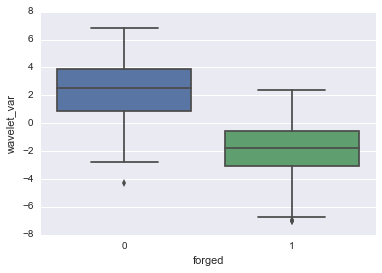

In [12]:
# Build a logistic regression model without predictors
sns.boxplot(x='forged', y='wavelet_var', data=banknote)

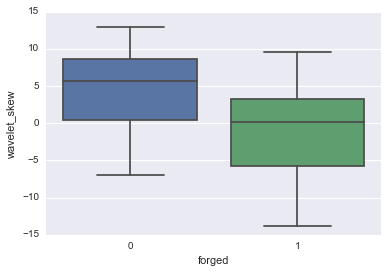

In [13]:
sns.boxplot(x='forged', y='wavelet_skew', data=banknote)

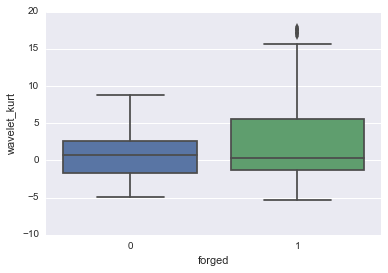

In [14]:
sns.boxplot(x='forged', y='wavelet_kurt', data=banknote)

In [28]:
model_intercept = smf.logit('forged ~ 1', data=banknote).fit()

Optimization terminated successfully.
         Current function value: 0.686998
         Iterations 4


In [30]:
# Take the exponential and the intercept tells you the odds of banknote being forged
np.exp(model_intercept.params)

Intercept    0.800525
dtype: float64

In [37]:
odds_forged = banknote[banknote.forged == 1].forged.sum() /\
           (len(banknote['forged']))
odds_forged

0.4446064139941691

In [49]:
# Build one logistic regression model for each predictor
model_var = smf.logit('forged ~ wavelet_var', data=banknote).fit()

Optimization terminated successfully.
         Current function value: 0.338283
         Iterations 7


In [20]:
model_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 forged   No. Observations:                 1372
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            1
Date:                Tue, 31 May 2016   Pseudo R-squ.:                  0.5076
Time:                        19:55:14   Log-Likelihood:                -464.12
converged:                       True   LL-Null:                       -942.56
                                        LLR p-value:                4.254e-210
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -0.0521      0.083     -0.629      0.530        -0.215     0.110
wavelet_var    -1.0113      0.053    -19.119      0.000        -1.115    -0.908
===============================================================================
"""

In [21]:
model_var.prsquared

0.5075919257478172

In [26]:
model_skew = smf.logit('forged ~ wavelet_skew', data=banknote).fit()
model_skew.prsquared

Optimization terminated successfully.
         Current function value: 0.579751
         Iterations 5


0.15610949925390771

In [27]:
model_kurt = smf.logit('forged ~ wavelet_kurt', data=banknote).fit()
model_kurt.prsquared

Optimization terminated successfully.
         Current function value: 0.674789
         Iterations 4


0.017770510736769496

In [39]:
model_all = smf.logit('forged ~ wavelet_kurt + wavelet_skew + wavelet_var', data=banknote).fit()

Optimization terminated successfully.
         Current function value: 0.019424
         Iterations 13


In [53]:
#check whether numbers make sense, looking at whether after building numbers it reflects calulated odds.
# Select the ‘best’ predictor based on the AIC, and build three models including
# this variable and each of the remaining three
# Rule of thumb: ΔAIC < 2  = No difference, prefer model with less predictors
#                     < 6  = Model with lower AIC is preferred (assuming large N)
#                     < 10 = Model with lower AIC is preferred (assuming small N)
#                     ≥ 10 = Model with lower AIC is strongly preferred (always)
model_all.summary()
model_all.aic

61.298639045349091

In [50]:
model_var.aic

932.24909448552819

In [48]:
model_skew.aic

1594.8362070466731

In [51]:
model_kurt.aic

1855.6220217758437

In [ ]:
# Repeat, building two models including the two ‘most predictive’ variables and
# each of the remaining predictors


In [ ]:
# Finally, build the last model including all predictors

In [ ]:
# Print out and interpret the coefficients of the ‘most predictive’ model